# LightGBM

In [1]:
import lightgbm as lgb

In [4]:
import seaborn as sns
import pandas as pd
#データ準備
df = sns.load_dataset('titanic')

#欠損値を削除 今回はバギングを試したいだけなのでただ欠損値を落とす
df.dropna(inplace=True)

# X, yを作成
y_col = ['survived','alive']
X = df.drop(columns=y_col)
y = df['survived']

#決定木では、ワンホットエンコーディングではなく、ラベルエンコーディングでもあまり問題ではない
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.set_output(transform='pandas') #←これを使うとDataFrameの形で返してくれる
X = oe.fit_transform(X) #　このままではnumpyの形で返ってくる

#hold out
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [13]:
#LightGBM
lgbmc = lgb.LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)
#本来eavl_setにはtestデータではなく、評価検証用データを入れる。今回は省略
eval_set=[(X_test, y_test)]
callbacks=[]
callbacks.append(lgb.early_stopping(stopping_rounds=10))
callbacks.append(lgb.log_evaluation())
lgbmc.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

[1]	valid_0's binary_logloss: 0.56902
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.536293
[3]	valid_0's binary_logloss: 0.50876
[4]	valid_0's binary_logloss: 0.485108
[5]	valid_0's binary_logloss: 0.464864
[6]	valid_0's binary_logloss: 0.447251
[7]	valid_0's binary_logloss: 0.433086
[8]	valid_0's binary_logloss: 0.41859
[9]	valid_0's binary_logloss: 0.408127
[10]	valid_0's binary_logloss: 0.400311
[11]	valid_0's binary_logloss: 0.400311
[12]	valid_0's binary_logloss: 0.400311
[13]	valid_0's binary_logloss: 0.400311
[14]	valid_0's binary_logloss: 0.400311
[15]	valid_0's binary_logloss: 0.400311
[16]	valid_0's binary_logloss: 0.400311
[17]	valid_0's binary_logloss: 0.400311
[18]	valid_0's binary_logloss: 0.400311
[19]	valid_0's binary_logloss: 0.400311
[20]	valid_0's binary_logloss: 0.400311
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.400311


LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

In [16]:
from sklearn.metrics import roc_auc_score
y_pred_lgbmc = lgbmc.predict_proba(X_test)
print(f'light gbm AUC: {roc_auc_score(y_test, y_pred_lgbmc[:, 1])}')

light gbm AUC: 0.9383012820512822


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

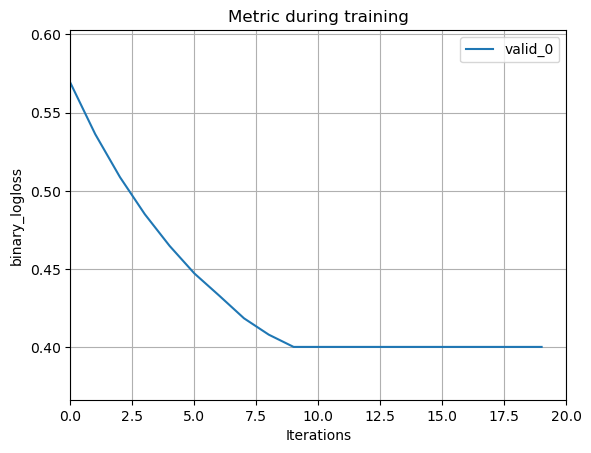

In [18]:
#学習曲線
lgb.plot_metric(lgbmc)

<AxesSubplot:>

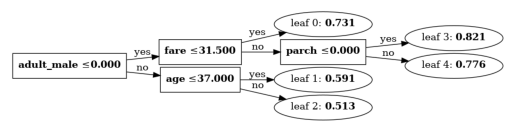

In [19]:
lgb.plot_tree(lgbmc, tree_index=0)